# Exploratory Data Analysis
Author: Andre Telfer  
Email: andretelfer@gmail.com

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from pathlib import Path
from IPython.display import display, HTML

random.seed(42)

data_folder = Path('../data/raw')

mitbih_train_df = pd.read_csv(data_folder / "mitbih_train.csv", header=None)
# mitbih_test_df = pd.read_csv(data_folder / "mitbih_test.csv", header=None)
# ptbdb_normal_df = pd.read_csv(data_folder / "ptbdb_normal.csv", header=None)
# ptbdb_abnormal_df = pd.read_csv(data_folder / "ptbdb_abnormal.csv", header=None)

dfs = {
    'mitbih_train': mitbih_train_df,
    # 'mitbih_test': mitbih_test_df,
    # 'ptbdb_normal': ptbdb_normal_df,
    # 'ptbdb_abnormal': ptbdb_abnormal_df
}

## Info 
Notes: 
- datasets are solely numeric
- ~~all dataframes have the same number of columns and datatypes~~
- ~~dataframe sizes vary considerably, indicates imbalanced classes for ptbdb_abnormal vs ptbdb_normal~~

In [103]:
for key, df in dfs.items():
    display(HTML(f"<h3>{key}<h3>"))
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


## Scales and Normalization
Notes:
- Data has been scaled between 0 and 1 (except for the last column)
- Last column appears to be the class 

In [104]:
for key, df in dfs.items():
    display(HTML(f"<h3>{key}<h3>"))
    display(df.describe())

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## Missing Values
Notes:
- Shorter signals seemed to be autofilled with 0 instead of nan values. This could be significant as signal length might be a valuable feature. Adding a uniform noise later for augmentation could obscure information about signal length.

In [105]:
for key, df in dfs.items():
    display(HTML(f"<h3>{key}<h3>"))
    display(df.isna().sum().sum())

0

## Class Distribution
Notes: 
- Classes appear very imbalanced, this should be accomodated during training (sampling or weight the loss function)

In [106]:
for key, df in dfs.items():
    display(HTML(f"<h3>{key}<h3>"))

    # Group by the class column
    last_column = df.columns[-1]
    df = df.rename(columns={0:'count', last_column:'class'})
    df = df.groupby('class').agg(dict(count='count'))

    # Determine ratio 
    df['ratio'] = round(df['count'] / df['count'].sum(), 3)
    display(df)


,count,ratio
class,,
0.0,72471,0.828
1.0,2223,0.025
2.0,5788,0.066
3.0,641,0.007
4.0,6431,0.073


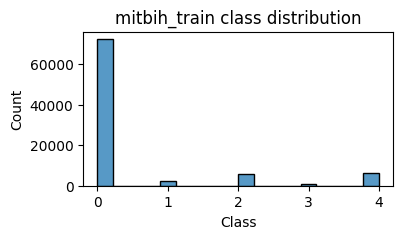

In [107]:
for key, df in dfs.items():
    display(HTML(f"<h3>{key}<h3>"))
    plt.figure(figsize=(4,2))
    plt.title(f"{key} class distribution")
    sns.histplot(data=df, x=df.columns[-1])
    plt.xlabel('Class')
    plt.show()

## Class Visualizations
Notes:
- The length, shape, and variability of signals changes noticeably with the class
  - length can easily be extracted using feature engineering, similarly with the peak time and possibly number of peaks. 
  - features can be engineered for overall shape, but this is something I would expect a neural network to learn well
- Overall noise level appears low, so adding noise as augmentation may not be very impactful. For augmentation maybe less emphasis on adding noise and more on shifting signals, or cutting and pasting parts of signals together

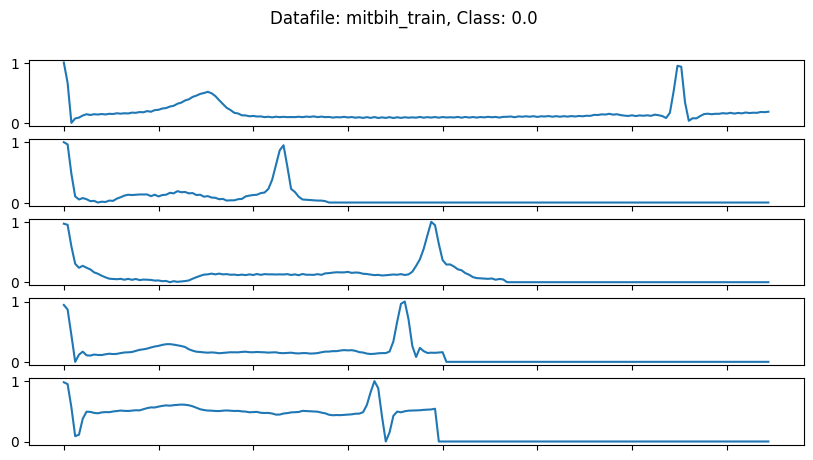

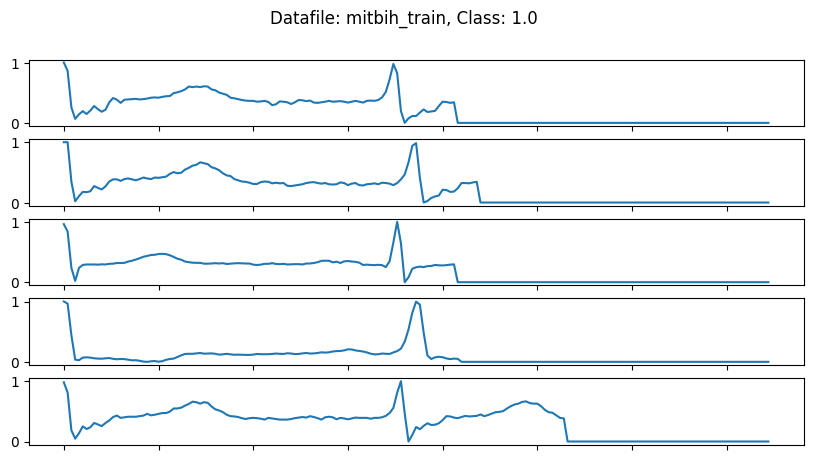

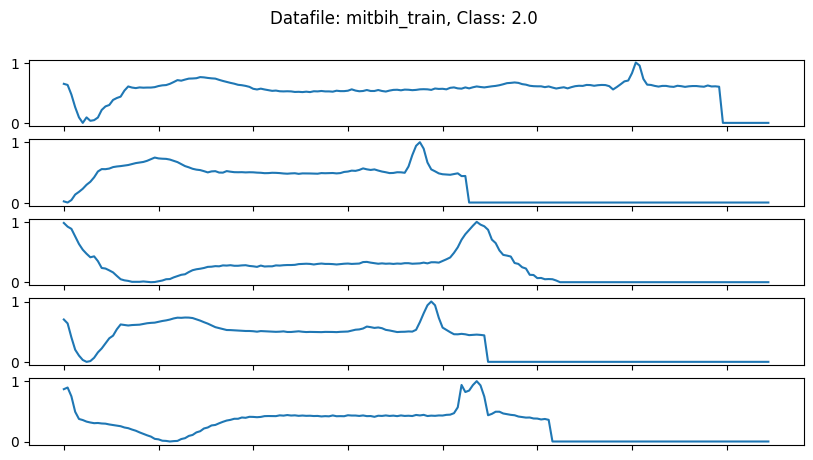

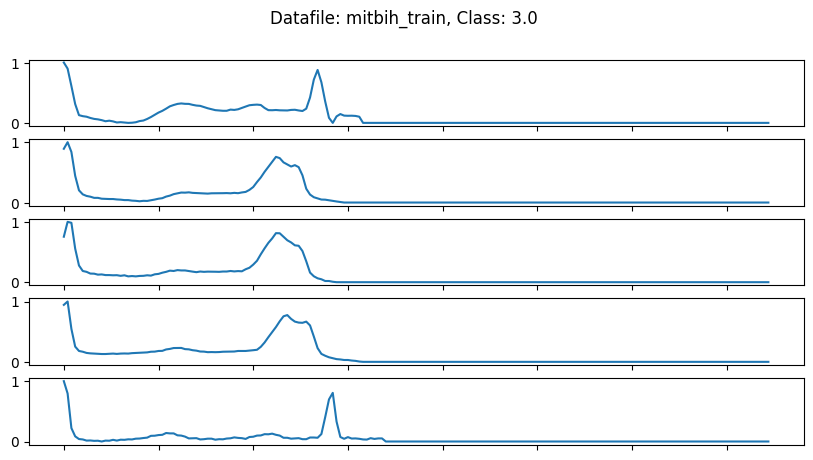

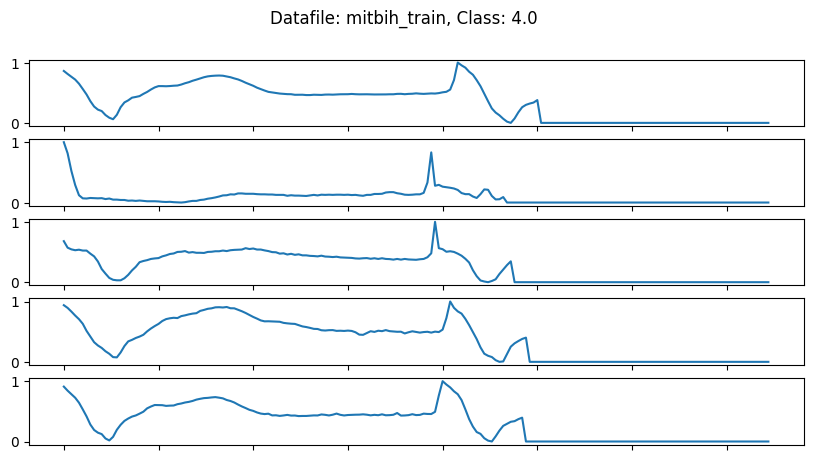

In [108]:
random.seed(42) # Already seeded at the beginning but may want to try multiple values

n_samples_per_class = 5

for key, df in dfs.items():
    # Groupby class and iterate over each one
    df = df.rename(columns={df.columns[-1]: 'class'})
    for c, c_df in df.groupby('class'):

        # For each class, plot a number of samples
        plt.figure(figsize=(10,5))
        gs = plt.GridSpec(5,1)
        samples = c_df.sample(n_samples_per_class)
        for i in range(len(samples)):
            plt.subplot(gs[i])
            plt.plot(samples.iloc[i,:-1])
            plt.gca().axes.xaxis.set_ticklabels([])

        plt.suptitle(f"Datafile: {key}, Class: {c}")